In [1]:
import time

def greedy_1(graph, initial_energy):
    start = time.time()

    # Initialization
    path = [0]
    cost = 0
    total_rewards = graph.nodes[0]['prize']
    energy_per_meter = 1 / 0.002

    # While there's remaining energy
    while initial_energy > 0:
        # Find the node with the highest prize to energy ratio that can be reached
        max_value = -1
        future_node = None
        for node in graph.nodes:
            if node not in path and graph.nodes[node]['energy'] <= initial_energy:
                # Calculate the prize to energy ratio
                value = graph.nodes[node]['prize'] / (graph.nodes[node]['energy'] * energy_per_meter)
                if value > max_value:
                    max_value = value
                    future_node = node

        if future_node is None:
            break

        # Move to the future_node
        path.append(future_node)
        cost += graph.nodes[future_node]['energy'] * energy_per_meter
        total_rewards += graph.nodes[future_node]['prize']
        initial_energy -= graph.nodes[future_node]['energy'] * energy_per_meter

    # Return to node 0
    path.append(0)
    cost += graph.nodes[0]['energy'] * energy_per_meter

    end = time.time()
    elapsed_time = end - start

    # Remaining energy level
    remaining_energy = initial_energy

    # Print the results
    print(f"Path: {path}")
    print(f"Path cost: {cost}")
    print(f"Total rewards: {total_rewards}")
    print(f"Energy left: {remaining_energy}")
    print(f"Elapsed time: {elapsed_time}")

    return path, cost, total_rewards, remaining_energy, elapsed_time

# **50x50 IoT sensor network graph with 50 sensor nodes deployed. Tr = 5.  The graph is not connected, with 22 connected components.**

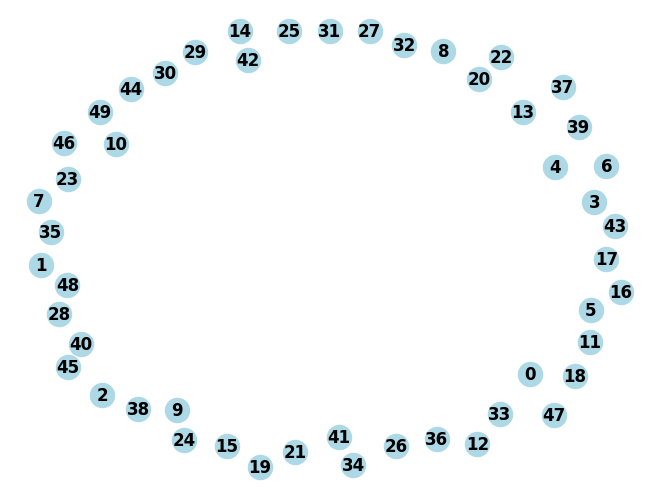

Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0]
Path cost: 1050000.0
Total rewards: 210
Energy left: 0.0
Elapsed time: 0.0014679431915283203


In [2]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes to the graph
for i in range(50):
    # For simplicity, let's say each node has a prize of 10 and requires 100 joules of energy to move to
    G.add_node(i, prize=10, energy=100)

import matplotlib.pyplot as plt

nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold')
plt.show()
# Set the initial energy level of the robot
B = 1000000  # joules

# Call the greedy algorithm
route, cost, total_prizes, remaining_energy, running_time = greedy_1(G, B)

# This will print the route, cost, total prizes, remaining energy, and running time

In [3]:
import time

def greedy_2(graph, energy_level):
    start = time.time()

    # Start at node 0
    path = [0]
    remaining_energy = energy_level
    total_rewards = 0
    cost = 0

    while remaining_energy > 0:
        # Find the node that has the maximum prize to energy ratio and can be reached
        future_node = None
        highest_ratio = 0
        for node in graph.nodes:
            if node not in path:
                reward = graph.nodes[node]['prize']
                energy_needed = graph.nodes[node]['energy']
                current_ratio = reward / energy_needed
                if current_ratio > highest_ratio and remaining_energy >= energy_needed:
                    highest_ratio = current_ratio
                    future_node = node

        # If there's no next node, end the loop
        if future_node is None:
            break

        # Visit the future_node
        path.append(future_node)
        remaining_energy -= graph.nodes[future_node]['energy']
        total_rewards += graph.nodes[future_node]['prize']
        cost += graph.nodes[future_node]['energy']

    # Return to node 0
    path.append(0)

    elapsed_time = time.time() - start

    # Print the results
    print(f"Path: {path}")
    print(f"Path cost: {cost}")
    print(f"Total rewards: {total_rewards}")
    print(f"Energy left: {remaining_energy}")
    print(f"Elapsed time: {elapsed_time}")

    return path, cost, total_rewards, remaining_energy, elapsed_time

In [4]:
# Set the initial energy level of the robot
B = 1000000  # joules

# Call the greedy algorithm
route, cost, total_prizes, remaining_energy, running_time = greedy_2(G, B)

# This will print the route, cost, total prizes, remaining energy, and running time

Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0]
Path cost: 4900
Total rewards: 490
Energy left: 995100
Elapsed time: 0.0030946731567382812


# **50x50 IoT sensor network graph with 50 sensor nodes deployed. Tr = 5.  The graph is not connected, with 22 connected components.**

True


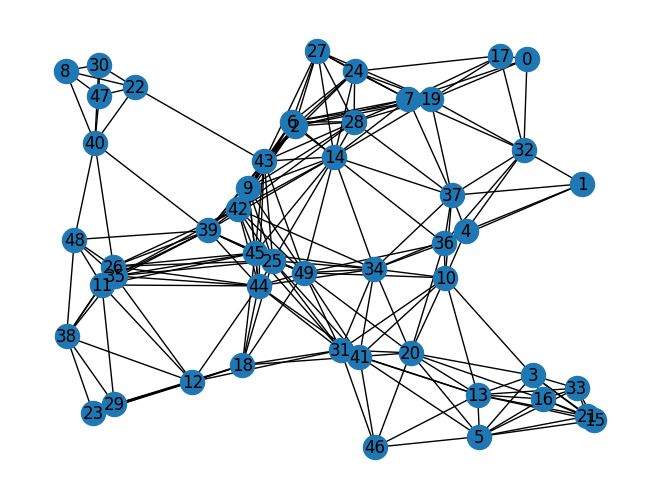

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Set up parameters
node_count = 50
network_width = 50
network_length = 50
transmission_distance = 15

# Initialize an empty graph
sensor_network = nx.Graph()

# Populate the graph with nodes at random positions
for node in range(node_count):
    pos_x = random.uniform(0, network_width)
    pos_y = random.uniform(0, network_length)
    sensor_network.add_node(node, position=(pos_x, pos_y))

# Generate edges between nodes that are within the transmission range
for node_1 in range(node_count):
    for node_2 in range(node_1 + 1, node_count):  # Avoids self-loops and duplicate edges
        pos_x_1, pos_y_1 = sensor_network.nodes[node_1]['position']
        pos_x_2, pos_y_2 = sensor_network.nodes[node_2]['position']
        if ((pos_x_1 - pos_x_2)**2 + (pos_y_1 - pos_y_2)**2)**0.5 <= transmission_distance:
            sensor_network.add_edge(node_1, node_2)

# Assess if the graph is connected
print(nx.is_connected(sensor_network))

# Plot the graph
node_positions = nx.get_node_attributes(sensor_network, 'position')
nx.draw(sensor_network, node_positions, with_labels=True)
plt.show()

In [6]:
print("Greedy 1 results")
# Set the initial energy level of the robot
B = 1000000  # joules

# Call the greedy algorithm
route, cost, total_prizes, remaining_energy, running_time = greedy_1(G, B)

print("\n")

print("Greedy 2 results")
# Set the initial energy level of the robot
B = 1000000  # joules

# Call the greedy algorithm
route, cost, total_prizes, remaining_energy, running_time = greedy_2(G, B)

# This will print the route, cost, total prizes, remaining energy, and running time

Greedy 1 results
Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0]
Path cost: 1050000.0
Total rewards: 210
Energy left: 0.0
Elapsed time: 0.0039479732513427734


Greedy 2 results
Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0]
Path cost: 4900
Total rewards: 490
Energy left: 995100
Elapsed time: 0.005132913589477539
